# <center>**Bài tập TH1:  Phân tích dữ liệu**
## <center>**Môn học:** Khai thác dữ liệu & Ứng dụng
## <center>**Mã lớp:** CS313.N21
## <center>**GVHD:** Th.S Nguyễn Thị Anh Thư
---
**Danh sách sinh viên thực hiện:**
1. 19522525 - Nguyễn Văn Vinh
2. 20520239 - Nguyễn Hoàng Long
3. 20521881 - Trần Nguyễn Nhật Tân
4. 21520352 - Trần Xuân Minh
5. 21520800 - Lê Thu Hà

# VẤN ĐỀ NHÓM ĐẶT RA VÀ PHƯƠNG HƯỚNG GIẢI QUYẾT

# 0. TẢI CÁC THƯ VIỆN SỬ DỤNG

In [959]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from IPython.display import clear_output

# 1. ĐỌC DỮ LIỆU, TIỀN XỬ LÝ VÀ TRỰC QUAN HOÁ DỮ LIỆU

## 1.1. Dữ liệu `01.sinhvien`

In [960]:
sinhvien = pd.read_excel("Education_dataset_V2/01.sinhvien.xlsx")
sinhvien.columns

Index(['id', 'mssv', ' namsinh', ' gioitinh', ' noisinh', ' lopsh', ' khoa',
       ' hedt', ' khoahoc', ' chuyennganh2', ' tinhtrang', ' diachi_tinhtp',
       'Column1', '_1', '_2', '_3', '_4', '_5', '_6', '_7', '_8', '_9', '_10',
       '_11', '_12', '_13', '_14', '_15', '_16', '_17', '_18', '_19', '_20',
       '_21', '_22', '_23', '_24', '_25', '_26', '_27', '_28', '_29', '_30',
       '_31', '_32', '_33', '_34', '_35', '_36', '_37', '_38', '_39', '_40',
       '_41', '_42', '_43', '_44', '_45', '_46', '_47', '_48', '_49', '_50',
       '_51', '_52', '_53', '_54', '_55', '_56'],
      dtype='object')

In [961]:
''' Trong bảng dữ liệu 01.sinhvien
    dữ liệu nằm rải rác ở các cột sau cột diachi_tinhtp, và những cột này không ảnh hưởng đến kết quả
    mà nhóm muốn phân tích. Vì vậy nhóm chỉ sử dụng các cột thông tin có ý nghĩa và rename các cột đó
    để tường minh về mặt ngữ nghĩa hơn
        Hai dòng dưới đây dùng để chọn ra các cột mà nhóm sẽ sử dụng của bảng dữ liệu `01.sinhvien`
'''
sinhvien = sinhvien[sinhvien.columns[1:12]]
sinhvien.columns

Index(['mssv', ' namsinh', ' gioitinh', ' noisinh', ' lopsh', ' khoa', ' hedt',
       ' khoahoc', ' chuyennganh2', ' tinhtrang', ' diachi_tinhtp'],
      dtype='object')

In [962]:
new_columns = ['MSSV', 'NamSinh', 'GioiTinh', 'NoiSinh', 'Lopsh', 'Khoa', 'Hedt',
       'KhoaHoc', 'ChuyenNganh2', 'TinhTrang', 'DiaChi_TinhTP']
sinhvien.columns = new_columns
sinhvien

,MSSV,NamSinh,GioiTinh,NoiSinh,Lopsh,Khoa,Hedt,KhoaHoc,ChuyenNganh2,TinhTrang,DiaChi_TinhTP
0,BE375BAAXPvAibaEXe9JDlHA4z2GHJ3/PVStCxR2,1995.0,1.0,TP. Hồ Chí Minh,KTPM0001,CNPM,CQUI,8.0,D480103,3.0,Thành phố Hồ Chí Minh
1,2420ED57XPvAibaEXe/Lh6v1XxTKJa6JLFRUPkLM,1995.0,1.0,Đồng Tháp,HTTT0001,HTTT,CTTT,8.0,D480104,3.0,Huyện Hóc Môn
2,83B76C01XPvAibaEXe/lOccskaOiO2K46r7t4qnt,1994.0,1.0,Hà Nam Ninh,KHMT2013,KHMT,CQUI,8.0,D480101,5.0,Tỉnh Hà Nam
3,91F785ABXPvAibaEXe/lOccskaOiO5y4GbVvuRQu,1995.0,1.0,TP. Hồ Chí Minh,HTTT0001,HTTT,CTTT,8.0,D480104,3.0,Thành phố Hồ Chí Minh
4,007C275DXPvAibaEXe+TFgEDwYNnveOOmOYeYzF6,1995.0,1.0,Thành phố Hồ Chí Minh,MMTT0001,MMT&TT,CQUI,8.0,D480201,8.0,Thành phố Hồ Chí Minh
...,...,...,...,...,...,...,...,...,...,...,...
8311,7D7633B0XPvAibaEXe95IhrkYSGfcCQVGm4nFGyt,2000.0,1.0,'An Giang',MMCL2019.2,MMT&TT,CLC,14.0,7480102,2.0,'Tỉnh An Giang'
8312,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,2001.0,1.0,'Bình Thuận',KHMT2019,KHMT,CQUI,14.0,D480101,1.0,'Tỉnh Bình Thuận'
8313,75AD7B4AXPvAibaEXe8xMCTZ03/BewoGrWSt0ZXM,2001.0,1.0,'Lâm Đồng',KHMT2019,KHMT,CQUI,14.0,D480101,1.0,'Tỉnh Lâm Đồng'
8314,CB263C18XPvAibaEXe8xMCTZ03/Be8yk40QWdPiR,2000.0,1.0,'Bến Tre',CNTT2019,KTTT,CQUI,14.0,D480201,1.0,'Tỉnh Bến Tre'


In [963]:
sinhvien["NamSinh"] = sinhvien["NamSinh"].astype("Int64")
fig = px.bar(x = sinhvien["NamSinh"].value_counts().index,
             y = sinhvien["NamSinh"].value_counts().values,
             labels = {'x': "Năm sinh",
                     'y': "Số lượng"},
             color = sinhvien["NamSinh"].value_counts().index,
             title = "Số lượng sinh viên đang theo học")

'''Nhận xét: 
Số lượng sinh viên phần lớn sinh năm 1995 đến 2001,
Điểm này sẽ được lưu ý khi thực hiện phân tích và đánh giá ở các bước sau.
'''
fig

In [964]:
sinhvien["DiaChi_TinhTP"].value_counts()
fig = px.bar(x = sinhvien["DiaChi_TinhTP"].value_counts()[:20].index,
             y = sinhvien["DiaChi_TinhTP"].value_counts()[:20].values,
             labels = {'x': "Nơi sinh sống",
                     'y': "Số lượng"},
             color = sinhvien["DiaChi_TinhTP"].value_counts()[:20].index,
             title="Top 20 khu vực có số lượng sinh viên theo học nhiều nhất ở UIT")
fig

### Nhận xét
* TP Hồ Chí Minh là khu vực có số lượng sinh viên theo học tại UIT nhiều hơn hẳn các khu vực còn lại. Còn lại các khu vực khác không có sự khác biệt quá lớn về số lượng. 
* Lý do cho vấn đề này là do UIT nằm ở khu vực TP HCM
* Tỉ lệ sinh viên theo từng khu vực cũng vì đó có sự khác biệt lớn

## 1.2. Dữ liệu `02.diem`

In [965]:
score = pd.read_excel("Education_dataset_V2/02.diem.xlsx")
score

,id,mssv,mamh,malop,sotc,namhoc,hocky,diem,trangthai,mamh_tt
0,137424.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,CS1113,CS1113.D11,4.0,2012.0,1.0,0.0,2.0,NULL
1,140865.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,PH001,PH001.D11,4.0,2012.0,1.0,0.0,1.0,NULL
2,141624.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ENGL1113,ENGL1113.D11CTTT,3.0,2012.0,1.0,0.0,2.0,NULL
3,141651.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ADENG1,ADENG1.D11CTTT,0.0,2012.0,1.0,0.0,2.0,NULL
4,141684.0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,SS001,SS001.D11CTTT,5.0,2012.0,1.0,0.0,2.0,NULL
...,...,...,...,...,...,...,...,...,...,...
99094,NaN,577C2F7AXPvAibaEXe+02ryNj/uIX7kQnyK7nQCD,IT005,IT005.H21,4.0,2016.0,2.0,5.3,1.0,NULL)
99095,NaN,D1C33C40XPvAibaEXe9xHju59ydahS2HvMczzT5k,IT005,IT005.H21,4.0,2016.0,2.0,4.2,2.0,NULL)
99096,NaN,882FB1B0XPvAibaEXe8y6/RMXZRwBebw/cEMIAJK,IT005,IT005.H21,4.0,2016.0,2.0,0.0,1.0,NULL)
99097,NaN,2FCE0D1DXPvAibaEXe+4XPPXlKRz0GVlqKh+FNRG,IT005,IT005.H21,4.0,2016.0,2.0,0.0,1.0,NULL)


In [966]:
score.columns = ['id', 'masv', 'mamh', 'malop', 'sotc', 'namhoc', 'hocky', 'diem','trangthai', 'mamh_tt']
score = score.drop(["id"], axis = 1)
score

,masv,mamh,malop,sotc,namhoc,hocky,diem,trangthai,mamh_tt
0,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,CS1113,CS1113.D11,4.0,2012.0,1.0,0.0,2.0,NULL
1,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,PH001,PH001.D11,4.0,2012.0,1.0,0.0,1.0,NULL
2,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ENGL1113,ENGL1113.D11CTTT,3.0,2012.0,1.0,0.0,2.0,NULL
3,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,ADENG1,ADENG1.D11CTTT,0.0,2012.0,1.0,0.0,2.0,NULL
4,31D5D488XPvAibaEXe85Kg8gbEhwbxD0x3mi2el8,SS001,SS001.D11CTTT,5.0,2012.0,1.0,0.0,2.0,NULL
...,...,...,...,...,...,...,...,...,...
99094,577C2F7AXPvAibaEXe+02ryNj/uIX7kQnyK7nQCD,IT005,IT005.H21,4.0,2016.0,2.0,5.3,1.0,NULL)
99095,D1C33C40XPvAibaEXe9xHju59ydahS2HvMczzT5k,IT005,IT005.H21,4.0,2016.0,2.0,4.2,2.0,NULL)
99096,882FB1B0XPvAibaEXe8y6/RMXZRwBebw/cEMIAJK,IT005,IT005.H21,4.0,2016.0,2.0,0.0,1.0,NULL)
99097,2FCE0D1DXPvAibaEXe+4XPPXlKRz0GVlqKh+FNRG,IT005,IT005.H21,4.0,2016.0,2.0,0.0,1.0,NULL)


In [967]:
score = score.dropna()
score["namhoc"] = score['namhoc'].astype("int64")

In [968]:
score['diem'] = score['diem'].replace(' NULL', np.nan)# chuyển Null sang np.nan để dùng fillna
score['diem'] = score['diem'].fillna(method='ffill')

data = score.astype(dtype = {'namhoc': np.int32, 'diem': np.float32})

yyears = np.unique(data['namhoc'])
print(yyears)#các năm mà dataset có


[2012 2013 2014 2015 2016]


In [969]:
'''
Lượng dữ liệu của năm 2012 quá ít vậy nên ta sẽ loại bỏ 
và chỉ lấy dữ liệu của các năm 2013, 2014, 2015, 2016
'''
fig = px.pie(values= score["namhoc"].value_counts().values,
             names=score["namhoc"].value_counts().index)
fig

In [970]:
score[score["namhoc"] != 2012]

,masv,mamh,malop,sotc,namhoc,hocky,diem,trangthai,mamh_tt
12,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,IT001,IT001.E11.ANTT,4.0,2013,1.0,2.5,2.0,NULL
13,FC77E598XPvAibaEXe879+AOg1gh8pb/q8KzJ2A3,IT001,IT001.E11.ANTT,4.0,2013,1.0,7.0,1.0,NULL
14,51E1C3E0XPvAibaEXe+4hxKfaQWuhLp2zzmiiyRe,IT001,IT001.E11.ANTT,4.0,2013,1.0,7.0,1.0,NULL
15,6920B9AAXPvAibaEXe83EtiN4MI2ns6NZhlUAIhE,IT001,IT001.E11.ANTT,4.0,2013,1.0,5.5,1.0,NULL
16,2F237AA9XPvAibaEXe/YKAlYnC3m967dOM4WK2IJ,IT001,IT001.E11.ANTT,4.0,2013,1.0,4.5,2.0,NULL
...,...,...,...,...,...,...,...,...,...
99094,577C2F7AXPvAibaEXe+02ryNj/uIX7kQnyK7nQCD,IT005,IT005.H21,4.0,2016,2.0,5.3,1.0,NULL)
99095,D1C33C40XPvAibaEXe9xHju59ydahS2HvMczzT5k,IT005,IT005.H21,4.0,2016,2.0,4.2,2.0,NULL)
99096,882FB1B0XPvAibaEXe8y6/RMXZRwBebw/cEMIAJK,IT005,IT005.H21,4.0,2016,2.0,0.0,1.0,NULL)
99097,2FCE0D1DXPvAibaEXe+4XPPXlKRz0GVlqKh+FNRG,IT005,IT005.H21,4.0,2016,2.0,0.0,1.0,NULL)


In [971]:
yyears = np.array([2013, 2014, 2015, 2016])
data_years = score.copy()
data_years = data_years.sort_values(by = 'namhoc', ascending = True)
data_years = data_years[data_years['namhoc'] != 2012]

#Tính điểm tổng kết sinh viên theo từng năm
data_years2013 = data_years[data_years['namhoc'] == 2013]
avg_score_student2013 = data_years2013.groupby('masv')['diem'].mean()

data_years2014 = data_years[data_years['namhoc'] == 2014]
avg_score_student2014 = data_years2014.groupby('masv')['diem'].mean()

data_years2015 = data_years[data_years['namhoc'] == 2015]
avg_score_student2015 = data_years2015.groupby('masv')['diem'].mean()

data_years2016 = data_years[data_years['namhoc'] == 2016]
avg_score_student2016 = data_years2016.groupby('masv')['diem'].mean()

#xếp loại cho sinh viên
bins_score = [0.0,5.0,6.5,8.0,10.1]#10.1 vì right = False
labels_score = ['Yeu', 'Trung binh', 'Kha', 'Gioi']

avg_score_student2013 = pd.DataFrame(pd.cut(avg_score_student2013, bins_score, labels = labels_score, right = False))
avg_score_student2014 = pd.DataFrame(pd.cut(avg_score_student2014, bins_score, labels = labels_score, right = False))
avg_score_student2015 = pd.DataFrame(pd.cut(avg_score_student2015, bins_score, labels = labels_score, right = False))
avg_score_student2016 = pd.DataFrame(pd.cut(avg_score_student2016, bins_score, labels = labels_score, right = False))

avg_score_student_sta2013 = [avg_score_student2013[avg_score_student2013['diem'] == i].shape[0] for i in labels_score]
avg_score_student_sta2014 = [avg_score_student2014[avg_score_student2014['diem'] == i].shape[0] for i in labels_score]
avg_score_student_sta2015 = [avg_score_student2015[avg_score_student2015['diem'] == i].shape[0] for i in labels_score]
avg_score_student_sta2016 = [avg_score_student2016[avg_score_student2016['diem'] == i].shape[0] for i in labels_score]

avg_score_student_stalist = [avg_score_student_sta2013, avg_score_student_sta2014, avg_score_student_sta2015, avg_score_student_sta2016]

# for i in range(4):
#   print(f'Xếp loại tổng học sinh năm {2013 + i}:')
#   print(f'Yếu: {avg_score_student_stalist[i][0]}')
#   print(f'Trung bình: {avg_score_student_stalist[i][1]}')
#   print(f'Khá: {avg_score_student_stalist[i][2]}')
#   print(f'Giỏi: {avg_score_student_stalist[i][3]}')

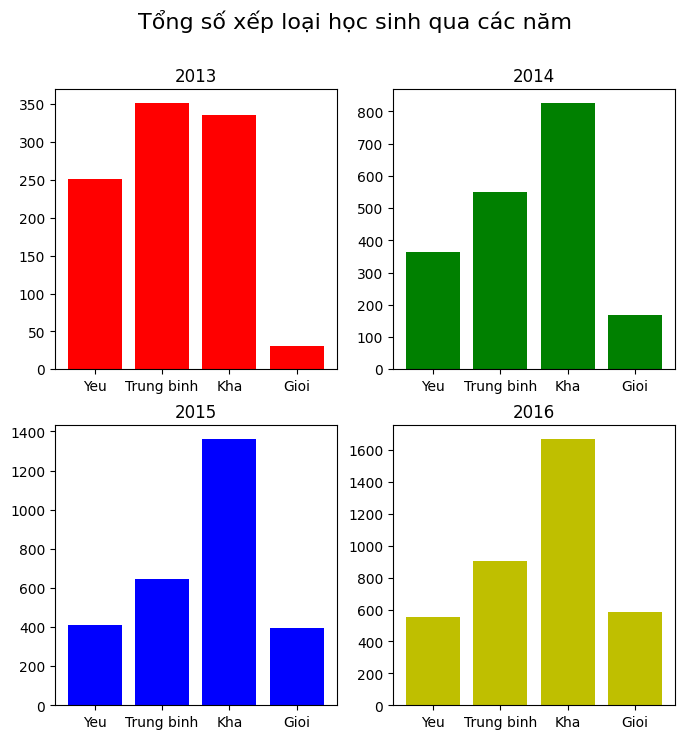

In [972]:
fig = plt.figure(figsize=(8,8))

colors = ['r', 'g', 'b', 'y']
for index in range(4):
  ax = fig.add_subplot(2,2, index + 1)
  ax.bar(labels_score, avg_score_student_stalist[index], color = colors[index])
  plt.title(f'{index + 2013}')
plt.suptitle('Tổng số xếp loại học sinh qua các năm', fontsize = 16)
plt.show()

In [973]:
import string
import re

#xóa các ký tự đặc biệu trong cột mamh
data_subjects = data_years.copy()
def remove_special_chars(text):
  return re.sub(r'[^\w\s]','',text)

data_subjects['mamh'] = data_subjects['mamh'].apply(remove_special_chars)

arr_subjects = np.unique(data_subjects['mamh'])

data_subjects['diem'] = pd.cut(data_subjects['diem'], bins_score, labels = labels_score, right = False)

#tổng hợp các loại học sinh của từng môn
data_subjects_sta = pd.DataFrame({'Mamh': [], 'Yeu':[], 'Trung_Binh': [], 'Kha': [], 'Gioi': []})

for i in range(arr_subjects.shape[0]):

  per_subj = list(data_subjects[data_subjects['mamh'] == arr_subjects[i]].groupby('diem')['diem'].count())#tổng hợp các loại học sinh của từng môn
  per_subj.insert(0,arr_subjects[i])
  data_subjects_sta = data_subjects_sta.append(pd.Series(data = per_subj, index = data_subjects_sta.columns, name = data_subjects_sta.shape[0]))
clear_output()

In [974]:
Yeu_max = data_subjects_sta[data_subjects_sta['Yeu'] == data_subjects_sta['Yeu'].max()].Mamh
Yeu_min = data_subjects_sta[data_subjects_sta['Yeu'] == data_subjects_sta['Yeu'].min()].Mamh
Gioi_max = data_subjects_sta[data_subjects_sta['Gioi'] == data_subjects_sta['Gioi'].max()].Mamh
Gioi_min = data_subjects_sta[data_subjects_sta['Gioi'] == data_subjects_sta['Gioi'].min()].Mamh

print('Môn học có số sinh viên không qua môn nhiều nhất: ',Yeu_max.values, data_subjects_sta['Yeu'].max(),'\n\n')
print('Môn học có số sinh viên không qua môn ít nhất: ', Yeu_min.values, data_subjects_sta['Yeu'].min(),'\n\n')
print('Môn học có số sinh viên đạt loại giỏi nhiều nhất: ', Gioi_max.values, data_subjects_sta['Gioi'].max(),'\n\n')
print('Môn học có số sinh viên đạt loại giỏi ít nhất: ', Gioi_min.values, data_subjects_sta['Gioi'].min(),'\n\n')

Môn học có số sinh viên không qua môn nhiều nhất:  [' MA002'] 1459.0 


Môn học có số sinh viên không qua môn ít nhất:  [' CE201' ' CE315' ' CE401' ' CS301' ' CS302' ' CS313' ' CS412' ' CS5030'
 ' IE206' ' NT112' ' NT210' ' NT332' ' NT334' ' NT406' ' NT503' ' SE301'
 ' SE313' ' SE325' ' SE501'] 0.0 


Môn học có số sinh viên đạt loại giỏi nhiều nhất:  [' PH001'] 2065.0 


Môn học có số sinh viên đạt loại giỏi ít nhất:  [' CE114' ' CE401' ' CE404' ' CS412' ' IS213' ' IS335' ' IS402' ' IS403'
 ' IS405' ' ITEM1' ' NT210' ' NT305' ' NT307' ' NT406' ' SE107' ' SE221'
 ' SE323' ' SE340' ' SMET2'] 0.0 




## 1.3. Dữ liệu `03.sinhvien_chungchi`

In [975]:
chungchi = pd.read_excel("Education_dataset_V2/03.sinhvien_chungchi.xlsx")
chungchi =  chungchi.drop(["id"," url"], axis = 1)
chungchi.columns

Index(['mssv', ' ngaythi', ' loaixn', ' url_1', ' loaixn_2', ' listening',
       ' speaking', ' reading', ' writing', ' tongdiem', ' lydo', ' trangthai',
       ' ngayxl', 'Column1'],
      dtype='object')

In [976]:

'''
Vì dữ liệu trong bảng `03.sinhvien_chungchi` định dạng các cột bị lệch,
vì vậy cần phải điều chỉnh tên cột cho phù hợp dữ liệu của nó. 
Ở đây nhóm sẽ dùng mảng new_columns để chọn tên các thuộc tính mới của bảng,
sau đó bỏ đi các cột không sử dụng. 
Kết quả của cell này đó là dữ liệu chứng chỉ tiếng anh với thông tin chính xác, 
dữ liệu này sẽ được sử dụng xuyên suốt các phần phía sau.
'''
new_columns =  ['MSSV', 'NgayThi', 'LoaiXN', 'Listening', 'Speaking',
                'Reading', 'Writing', 'TongDiem', 'LyDo', 'TrangThai', 'Ngay',
                'NULL', 'NULL1', 'NULL2']
chungchi.columns = new_columns
chungchi = chungchi.drop(["NULL","NULL1","NULL2"], axis = 1)
chungchi = chungchi.dropna(subset=["LoaiXN"])

'''
Dữ liệu bị trùng lặp khá nhiều do đó dựa vào MSSV và NgayThi để lọc ra các trường hợp bị lặp thông tin
'''
chungchi["NgayThi"] = chungchi["NgayThi"].str.replace("'", '').str.strip()
chungchi = chungchi.drop_duplicates(subset=["MSSV","NgayThi"], keep="first") 

In [977]:
chungchi["TrangThai"] = chungchi["TrangThai"].str.replace("'", '').str.strip()
chungchi["TrangThai"].unique()

array(['1', '3 và Đạt chuẩn đầu ra', '2', '-1',
       'hiện tại hình chụp không rõ nên không kiểm tra được thông tin.',
       'điểm chính xác là 240.', '0',
       'sinh viên vui lòng chọn lại loại chứng chỉ', 'không phảiTOEIC'],
      dtype=object)

In [978]:
chungchi = chungchi.loc[(chungchi["TrangThai"] == '0') |    
                     (chungchi["TrangThai"] == '1') |
                     (chungchi["TrangThai"] == '2') |
                     (chungchi["TrangThai"] == '3 và Đạt chuẩn đầu ra')]
chungchi

,MSSV,NgayThi,LoaiXN,Listening,Speaking,Reading,Writing,TongDiem,LyDo,TrangThai,Ngay
0,12C24162XPvAibaEXe9Xnw4t0GPgx9K2sCLXkxKl,NaN,TOIEC,NaN,NaN,NaN,NaN,NaN,,1,2017-09-08 13:56:09
1,9095EEE4XPvAibaEXe93PEySAJOVk2kOrJQCpxlr,NaN,TOIEC,NaN,NaN,NaN,NaN,NaN,,1,2017-09-08 13:55:15
2,538FDEFEXPvAibaEXe9P07hcrvmhCe3unM2XvNXE,NaN,TOIEC,NaN,NaN,NaN,NaN,NaN,,1,2017-09-08 13:55:27
3,82EB45E9XPvAibaEXe9eSUilQ3V71rLMOFZnU1bQ,NaN,TOIEC,NaN,NaN,NaN,NaN,NaN,,1,2017-09-08 13:56:00
4,DDB9E00CXPvAibaEXe/Xn8KZjn44cdZNDzzd5bIQ,NaN,TOIEC,NaN,NaN,NaN,NaN,NaN,,1,2017-09-08 13:55:51
...,...,...,...,...,...,...,...,...,...,...,...
1695,53BB8D1AXPvAibaEXe9Fy2hCq9OiA55gkkbklho/,2021-04-22,'TOEIC_LR',490.0,NaN,490.0,NaN,'980',NaN,0,NaN
1696,7075BE69XPvAibaEXe8WdGcsQTF3yHQhmzrDl1Yc,2021-05-21,'TOEIC_LR',310.0,NaN,250.0,NaN,'560',NaN,0,NaN
1697,063FA88DXPvAibaEXe+ItThaeWSaTndzLvy0hCWF,2021-04-24,'TOEIC_LR',395.0,NaN,260.0,NaN,'655',NaN,0,NaN
1698,EC99A310XPvAibaEXe9F2tx/ToPx3H/qqDPJ7QaV,2021-03-20,'VNU-EPT',NaN,NaN,NaN,NaN,'269',NaN,0,NaN


In [979]:
'''
Kiểm tra các loại bằng tiếng anh được xét,
ở đây có thể thấy dữ liệu chưa có sự đồng bộ(có thể là do cách nhập liệu khác nhau theo từng năm),
vì vậy cần định dạng lại dữ liệu này
'''
chungchi["LoaiXN"] = chungchi["LoaiXN"].str.replace("'", '').str.strip()
chungchi["LoaiXN"].unique()

array(['TOIEC', 'TOEIC_LR', 'VNU-EPT', 'IELTS', 'NHAT', 'Cambrigde',
       'TOEIC_SW', 'TOEFL iBT', 'PHAP', 'DGNL'], dtype=object)

In [980]:
'''
Có thể thấy, bằng TOEIC bị nhập sai chính tả thành TOIEC, cần điều chỉnh thông tin này,
Đoạn code dưới đây là cách thay đổi, sau đó là kết quả số lượng các loại chứng chỉ tiếng anh
được xét tại UIT
'''
chungchi["LoaiXN"] = chungchi["LoaiXN"].replace("TOIEC","TOEIC")
fig = px.bar(x = chungchi["LoaiXN"].value_counts().index,
             y = chungchi["LoaiXN"].value_counts().values,
         color = chungchi["LoaiXN"].value_counts().index,
             labels = {'x': "Năm sinh",
                     'y': "Số lượng"})
fig

### 1.3.1. TOEIC_LR

In [981]:
'''
Bằng TOEIC hai kỹ năng Listening và Reading chiếm phần lớn trong tất cả các loại bằng tiếng anh xét chuẩn đầu ra,
vì vậy nhóm sẽ phân tích điểm tổng của bằng TOEIC_LR để hiểu rõ hơn khoảng điểm của sinh viên khi thực hiện xét chứng chỉ.
Với các loại bằng khác, nhóm sẽ không phân tích quá nhiều về điểm các thành phần mà chỉ xem xét đến phần số lượng của chúng.
'''
chungchi_toeicLR = chungchi.loc[chungchi["LoaiXN"] == "TOEIC_LR"]
chungchi_toeicLR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 22 to 1697
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MSSV       1128 non-null   object 
 1   NgayThi    1000 non-null   object 
 2   LoaiXN     1128 non-null   object 
 3   Listening  1128 non-null   float64
 4   Speaking   0 non-null      float64
 5   Reading    1128 non-null   float64
 6   Writing    0 non-null      float64
 7   TongDiem   728 non-null    object 
 8   LyDo       759 non-null    object 
 9   TrangThai  1128 non-null   object 
 10  Ngay       831 non-null    object 
dtypes: float64(4), object(7)
memory usage: 105.8+ KB


In [982]:
'''
Dữ liệu ở hai cột kỹ năng Listening & Reading đều không bị khuyết,
do đó ta không cần xử lý quá nhiều. 
TongDiem = Listening + Reading
'''
chungchi_toeicLR["TongDiem"] = chungchi_toeicLR["Listening"].astype("int64") + chungchi_toeicLR["Reading"].astype("int64")


In [983]:
fig = px.bar(x = chungchi_toeicLR["TongDiem"].value_counts().index,
             y = chungchi_toeicLR["TongDiem"].value_counts().values,
             labels = {'x': "Khoảng điểm",
                     'y': "Số lượng"},
             color = chungchi_toeicLR["TongDiem"].value_counts().index,
             title="Điểm xét TOEIC 2 kỹ năng Listening & Reading")
fig

**Nhận xét**: Có thể thấy, điểm hai kỹ năng Listening và Reading phần lớn nằm trong khoảng 450 - 750 điểm, 
có thể thấy 450 có thể là khoảng điểm tối thiểu để xét chuẩn đầu ra ngoại ngữ tại trường. 

Và phần lớn sinh viên có điểm đánh giá hai kỹ năng nằm trong khoảng này - Vừa đủ dể đáp ứng các yêu cầu đọc hiểu tài liệu trong trường, cũng như ngoài doanh nghiệp

### 1.3.2 IELTS

In [984]:
chungchi_ielts = chungchi.loc[chungchi.LoaiXN == "IELTS"]
chungchi_ielts["TongDiem"] = chungchi["TongDiem"].str.replace("'", '').str.strip()
chungchi_ielts

,MSSV,NgayThi,LoaiXN,Listening,Speaking,Reading,Writing,TongDiem,LyDo,TrangThai,Ngay
30,15B88849XPvAibaEXe+9tOqtJ+TlMgs05RMBFJt2,NaN,IELTS,NaN,NaN,NaN,NaN,NaN,Miễn Anh văn 3 và đạt chuẩn đầu ra,1,2018-02-02 10:38:45
38,999A85F6XPvAibaEXe+SrLE9JUD3pKt4JI3o/RBG,NaN,IELTS,NaN,NaN,NaN,NaN,NaN,Đạt chuẩn đầu ra,1,2018-02-02 10:21:30
57,88C15831XPvAibaEXe879+AOg1gh8uMWWp9sXQnJ,NaN,IELTS,NaN,NaN,NaN,NaN,NaN,,1,2018-03-30 09:58:10
60,F585674DXPvAibaEXe93PEySAJOVk6T3mUZtHkOx,NaN,IELTS,NaN,NaN,NaN,NaN,NaN,,1,2018-03-30 09:57:58
67,CD52678BXPvAibaEXe97hU2RTHdNnHA5E5DKdC+D,NaN,IELTS,NaN,NaN,NaN,NaN,NaN,,1,2018-03-30 10:49:39
...,...,...,...,...,...,...,...,...,...,...,...
1672,F1AC7EB2XPvAibaEXe86ShnmDByrm6Sn44IZZf9+,2021-04-29,IELTS,NaN,NaN,NaN,NaN,7,NaN,1,2021-05-19 11:01:24
1685,0DFB77F9XPvAibaEXe+M8JaUhbJyeUks/6mlFMNg,2021-05-08,IELTS,NaN,NaN,NaN,NaN,6,NaN,1,'2021-05-21 14:15:12'
1690,F6F9475CXPvAibaEXe95t7IdlkoVf01nr8F41vO8,2021-04-29,IELTS,NaN,NaN,NaN,NaN,6.5,NaN,0,NaN
1694,E6729F7AXPvAibaEXe8XtTI6VHhlKCQByb9R31yq,2021-05-22,IELTS,NaN,NaN,NaN,NaN,6.0,NaN,0,NaN


**Nhận xét**: Vì dữ liệu IELTS chính xác phụ thuộc vào đường dẫn, 
và còn có nhiều cột bị trống, vì vậy sẽ không cần phân tích quá nhiều mà chỉ đếm số lượng
xem như các dữ liệu ở bảng trên là chính xác và thoả chuẩn đầu ra của nhà trường

## 1.4. Dữ liệu `05.ThiSinh`


In [985]:
thisinh = pd.read_excel("Education_dataset_V2/05.ThiSinh.xlsx")
new_columns = ['MSSV', 'DienThiSinh', 'DiemThi', 'MaTinh_L12', 'MaTruong_L12',
       'TenTruong']
thisinh.columns = new_columns
thisinh

,MSSV,DienThiSinh,DiemThi,MaTinh_L12,MaTruong_L12,TenTruong
0,7E308531XPvAibaEXe879+AOg1gh8i58Q/VMq7RU,THPT,24.50,53.0,32.0,THPT Bình Đông
1,0FCB6532XPvAibaEXe879+AOg1gh8o0EEQcYQ8HR,THPT,27.50,16.0,41.0,THPT Lê Xoay
2,BAF446BFXPvAibaEXe879+AOg1gh8uQrEauqA0AG,THPT,25.00,42.0,21.0,THPT Di Linh
3,599DFFB8XPvAibaEXe879+AOg1gh8lJvChSN7o+V,THPT,28.00,51.0,34.0,THPT Mỹ Hiệp
4,364B9E9BXPvAibaEXe879+AOg1gh8sRVdBmZSiXe,THPT,24.50,52.0,39.0,TTGDTX-HN Đất Đỏ (Trước 01/7/2019)
...,...,...,...,...,...,...
8229,418187C9XPvAibaEXe8Wb350a8ibnhbWI4z++VY2,THPT,21.10,56.0,14.0,THPT Phan Văn Trị
8230,738946F2XPvAibaEXe8Wb350a8ibnm5kQzFjIM2p,THPT,23.95,37.0,1.0,Quốc Học Quy Nhơn
8231,332E756EXPvAibaEXe8Wb350a8ibnvs4VyUWS40K,THPT,21.50,2.0,1.0,THPT Trưng Vương
8232,AB431338XPvAibaEXe8xMCTZ03/BexWzDCyWVsT3,THPT,24.70,47.0,25.0,THPT Quang Trung


In [986]:
thisinh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8234 entries, 0 to 8233
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSV          8234 non-null   object 
 1   DienThiSinh   8234 non-null   object 
 2   DiemThi       8104 non-null   float64
 3   MaTinh_L12    6060 non-null   float64
 4   MaTruong_L12  6061 non-null   float64
 5   TenTruong     6060 non-null   object 
dtypes: float64(3), object(3)
memory usage: 386.1+ KB


In [987]:
thisinh.dropna(subset=["DiemThi"], inplace=True)
clear_output()
thisinh = thisinh.loc[thisinh["DiemThi"] > 0]
thisinh["DienThiSinh"].unique()

array(['THPT', 'ƯT-Bộ', 'ƯT-ĐHQG', 'ĐGNL'], dtype=object)

In [988]:
fig = px.pie(thisinh, names='DienThiSinh',
             title='Tỉ lệ các diện thí sinh', labels={'lifeExp':'life expectancy'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [989]:
fig = px.histogram(thisinh.loc[thisinh["DienThiSinh"] == "THPT"], x = "DiemThi", nbins=50)
fig

In [990]:
fig = px.histogram(thisinh.loc[thisinh["DienThiSinh"] == "ĐGNL"], x = "DiemThi", text_auto=True)
fig

#### **Nhận xét**
* Điểm thi đầu vào của UIT theo diện THPT phân bổ nhiều vào phổ điểm từ 21 - 26 điểm, cho thấy yêu cầu điểm đầu vào tại UIT cũng rất cao và phân bổ theo ngành học.
* Điểm thi đầu vào của UIT theo diện ĐGNL phân bổ khá đều, nhiều nhất trong phổ điểm từ 840 - 920/1200, cũng là một ngưỡng điểm khá cao, phản ánh chất lượng đầu vào của trường cũng thuộc top các trường có yêu cầu đầu vào cao tại miền Nam.
* Với điểm thi THPT, được tính là điểm tổng của thí sinh (điểm thi + điểm ưu tiên) vì vậy có trường hợp nằm ngoài 30 điểm, sẽ cần phải tính chính xác điểm thi của sinh viên học tại trường.
* Với các hình thức khác, sẽ không phân tích quá nhiều vì sinh viên đã chắc chắn sẽ đậu vào trường, chỉ cần đủ điểm tốt nghiệp (các phương thức ưu tiên)
* Dữ liệu này còn thiếu một hình thức xét tuyển đầu vào của trường, đó là UTXT theo học bạ. 
* Ngoài ra dữ liệu này chưa phân bổ ra theo từng năm thi.

## 1.6. Dữ liệu `08.XLHV`

In [991]:
xulyhv = pd.read_excel("Education_dataset_V2/08.XLHV.xlsx")
xulyhv = xulyhv.drop(["id","Column1"], axis = 1)
xulyhv.columns

Index(['mssv', ' tinhtrang', ' lydo', ' hocky', ' namhoc', ' soqd', ' ngayqd'], dtype='object')

In [992]:
new_columns = ['MSSV', 'TinhTrang', 'LyDo', 'HocKy', 'NamHoc', 'Soqd', 'Ngayqd']
xulyhv.columns = new_columns

In [993]:
new_values = ["Cảnh cáo","Thôi học","Tự do","Gia hạn"]
xulyhv = xulyhv.replace(xulyhv["TinhTrang"].unique(), new_values)

In [994]:
fig = px.histogram(xulyhv, x = "NamHoc", 
                   color="TinhTrang", text_auto=True,
                   barmode="group",
                   title= "Số lượng các trường hợp XLHV")
fig

#### **Nhận xét**
* Các trường hợp XLHV trong UIT thường rơi vào trường hợp *Cảnh cáo*, và cũng có nhiều trường hợp bị Thôi học trong từng năm.
* Chứng tỏ sinh viên trong trường vẫn thường rơi vào tình huống bị Cảnh cáo học vụ. Đây cũng là một yếu tố để đánh giá mức độ chất lượng giáo dục của trường học

## 1.7. Dữ liệu `diemrl`

In [995]:
diemrl = pd.read_excel("Education_dataset_V2/diemrl.xlsx")
diemrl = diemrl.drop(["id"], axis = 1)

In [996]:
new_columns = ['MSSV', 'Lopsh', 'HocKy', 'NamHoc', 'DRL', 'GhiChu']
diemrl.columns = new_columns
diemrl

,MSSV,Lopsh,HocKy,NamHoc,DRL,GhiChu
0,2A10C466XPvAibaEXe8vcQUX+A6FeNIl5Loug1zV,ANTN2012,2,2013,81,NaN
1,903ADF1AXPvAibaEXe9p5G9u2qRxxZEjiJjD4Ztl,ANTN2012,2,2013,88,NaN
2,F06EDFFEXPvAibaEXe8KSegZW1rFPMNPBQ+c9rst,ANTN2012,2,2013,94,NaN
3,AA868AD5XPvAibaEXe+1Gm1QkI5oNyTYwjwmgxhx,ANTN2012,2,2013,86,NaN
4,E7105148XPvAibaEXe+E7LJdSZ9AW2sUcg4OSCnU,ANTN2012,2,2013,88,NaN
...,...,...,...,...,...,...
111973,BEE29266XPvAibaEXe+sfYgLIH7gO26xJqZJX9CM,HTTT2022,1,2022,98,Xuất sắc
111974,D939EB2AXPvAibaEXe+sfYgLIH7gO3/6Lj8KC/E/,CNNB2022,1,2022,81,Tốt
111975,4F301633XPvAibaEXe+sfYgLIH7gO18shsVHajwn,KHMT2022,1,2022,93,Xuất sắc
111976,783E8288XPvAibaEXe+sfYgLIH7gO/Sehf33Nrd5,KTPM2022,1,2022,86,Tốt


In [997]:
diemrl["DanhGia"] = diemrl["DRL"]
diemrl["DanhGia"].loc[diemrl["DRL"] >= 90] = "Xuất sắc"
diemrl["DanhGia"].loc[(diemrl["DRL"] >= 80) & (diemrl["DRL"] < 90)] = "Tốt"
diemrl["DanhGia"].loc[(diemrl["DRL"] >= 65) & (diemrl["DRL"] < 80)] = "Khá"
diemrl["DanhGia"].loc[(diemrl["DRL"] >= 50) & (diemrl["DRL"] < 65)] = "Trung bình"
diemrl["DanhGia"].loc[(diemrl["DRL"] >= 35) & (diemrl["DRL"] < 50)] = "Yếu"
diemrl["DanhGia"].loc[diemrl["DRL"] < 35] = "Kém"
diemrl

,MSSV,Lopsh,HocKy,NamHoc,DRL,GhiChu,DanhGia
0,2A10C466XPvAibaEXe8vcQUX+A6FeNIl5Loug1zV,ANTN2012,2,2013,81,NaN,Tốt
1,903ADF1AXPvAibaEXe9p5G9u2qRxxZEjiJjD4Ztl,ANTN2012,2,2013,88,NaN,Tốt
2,F06EDFFEXPvAibaEXe8KSegZW1rFPMNPBQ+c9rst,ANTN2012,2,2013,94,NaN,Xuất sắc
3,AA868AD5XPvAibaEXe+1Gm1QkI5oNyTYwjwmgxhx,ANTN2012,2,2013,86,NaN,Tốt
4,E7105148XPvAibaEXe+E7LJdSZ9AW2sUcg4OSCnU,ANTN2012,2,2013,88,NaN,Tốt
...,...,...,...,...,...,...,...
111973,BEE29266XPvAibaEXe+sfYgLIH7gO26xJqZJX9CM,HTTT2022,1,2022,98,Xuất sắc,Xuất sắc
111974,D939EB2AXPvAibaEXe+sfYgLIH7gO3/6Lj8KC/E/,CNNB2022,1,2022,81,Tốt,Tốt
111975,4F301633XPvAibaEXe+sfYgLIH7gO18shsVHajwn,KHMT2022,1,2022,93,Xuất sắc,Xuất sắc
111976,783E8288XPvAibaEXe+sfYgLIH7gO/Sehf33Nrd5,KTPM2022,1,2022,86,Tốt,Tốt


In [998]:
fig = px.histogram(diemrl.loc[diemrl["HocKy"] == 1], x = "NamHoc",
                   barmode="group", text_auto=True,
                   color="DanhGia",
                   title="Điểm rèn luyện học kỳ 1")
fig

In [999]:
fig = px.histogram(diemrl.loc[diemrl["HocKy"] == 2], x = "NamHoc",
                   barmode="group",
                   color="DanhGia",
                   title="Điểm rèn luyện học kỳ 2")
fig

#### **Nhận xét**
* Có thể thấy càng về sau, tỉ lệ sinh viên có điểm rèn luyện đạt loại Xuất sắc ngày càng nhiều
* Điều này chứng tỏ sinh viên ngày càng tham gia nhiều hoạt động trong trường
* Ngoài ra trong trường cũng có nhiều hoạt động hơn (phân bổ đều cả hai kỳ) để giúp cho sinh viên tham gia, kiếm thêm nhiều diểm rèn luyện hơn

**Kết luận**: Từ dữ liệu này ta có thể thấy, ngoài việc học tập thì việc tham gia các hoạt động xã hội của sinh viên trong trường cũng rất tốt, sinh viên đang phát triển cả kỹ năng chuyên môn lẫn kỹ năng mềm

# 1.8. Dữ liệu `diem_Thi`

In [1000]:
diemthi = pd.read_excel("Education_dataset_V2/diem_Thi.xlsx")
diemthi.columns

,mssv,mamh,malop,sotc,hocky,namhoc,diem_qt,diem_th,diem_gk,diem_ck,diem_hp,trangthai,tinhtrang,mamh_tt
0,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CARC1,K1C1_2,3,1,2006,NaN,NaN,NaN,NaN,2.0,2,0,NaN
1,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CSC21,K1C1_2,5,1,2006,NaN,NaN,NaN,NaN,5.0,1,0,NaN
2,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,ENG02,K1C1_2,0,1,2006,NaN,NaN,NaN,NaN,5.5,1,0,NaN
3,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,MAT21,K1C1_2,4,1,2006,NaN,NaN,NaN,NaN,6.5,1,0,NaN
4,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,PEDU1,K1C1_2,0,1,2006,NaN,NaN,NaN,NaN,7.0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674268,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,IE101.N11.LT,3,1,2022,8.0,7.0,NaN,7.5,7.6,1,0,NaN
674269,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,IE101.N11.LT,3,1,2022,9.0,8.5,NaN,7.0,7.9,1,0,NaN
674270,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,IE101.N11.LT,3,1,2022,8.5,7.5,NaN,8.0,8.1,1,0,NaN
674271,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,IE101.N11.LT,3,1,2022,6.0,8.0,NaN,7.0,6.9,1,0,NaN


In [1014]:
new_columns = ['MSSV', 'MaMH', 'MaLop', 'SoTC', 'HocKy', 'NamHoc', 'DiemQT',
       'Diem_TH', 'Diem_GK', 'Diem_CK', 'Diem_HP', 'TrangThai', 'TinhTrang',
       'MaMH_tt']
diemthi.columns = new_columns
diemthi

,MSSV,MaMH,MaLop,SoTC,HocKy,NamHoc,DiemQT,Diem_TH,Diem_GK,Diem_CK,Diem_HP,TrangThai,TinhTrang,MaMH_tt
0,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CARC1,K1C1_2,3,1,2006,NaN,NaN,NaN,NaN,2.0,2,0,NaN
1,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,CSC21,K1C1_2,5,1,2006,NaN,NaN,NaN,NaN,5.0,1,0,NaN
2,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,ENG02,K1C1_2,0,1,2006,NaN,NaN,NaN,NaN,5.5,1,0,NaN
3,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,MAT21,K1C1_2,4,1,2006,NaN,NaN,NaN,NaN,6.5,1,0,NaN
4,2117714DXPvAibaEXe8WaPZ0jKz4ts3P6QyM9Ybc,PEDU1,K1C1_2,0,1,2006,NaN,NaN,NaN,NaN,7.0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674268,78F971C7XPvAibaEXe/qyMkGG2RlFrgIY6/9Nnnk,IE101,IE101.N11.LT,3,1,2022,8.0,7.0,NaN,7.5,7.6,1,0,NaN
674269,35A4B1C2XPvAibaEXe/VxWgTgtHe07+vkN6++USd,IE101,IE101.N11.LT,3,1,2022,9.0,8.5,NaN,7.0,7.9,1,0,NaN
674270,7CDE61ABXPvAibaEXe/VxWgTgtHe04Encl5UmaMi,IE101,IE101.N11.LT,3,1,2022,8.5,7.5,NaN,8.0,8.1,1,0,NaN
674271,658FB4D5XPvAibaEXe/VxWgTgtHe02gf1ImYGwpE,IE101,IE101.N11.LT,3,1,2022,6.0,8.0,NaN,7.0,6.9,1,0,NaN


In [1048]:
diemthi = diemthi.dropna(subset=["Diem_HP"])

In [1049]:
namhoc = diemthi["NamHoc"].unique()
namhoc[0]

2006

In [1050]:
diemthi_2006 = diemthi.loc[diemthi["NamHoc"] == 2006]; diemthi_2007 = diemthi.loc[diemthi["NamHoc"] == 2007]
diemthi_2008 = diemthi.loc[diemthi["NamHoc"] == 2008]; diemthi_2009 = diemthi.loc[diemthi["NamHoc"] == 2009]
diemthi_2010 = diemthi.loc[diemthi["NamHoc"] == 2010]; diemthi_2011 = diemthi.loc[diemthi["NamHoc"] == 2011]
diemthi_2012 = diemthi.loc[diemthi["NamHoc"] == 2012]; diemthi_2013 = diemthi.loc[diemthi["NamHoc"] == 2013]
diemthi_2014 = diemthi.loc[diemthi["NamHoc"] == 2014]; diemthi_2015 = diemthi.loc[diemthi["NamHoc"] == 2015]
diemthi_2016 = diemthi.loc[diemthi["NamHoc"] == 2016]; diemthi_2017 = diemthi.loc[diemthi["NamHoc"] == 2017]
diemthi_2018 = diemthi.loc[diemthi["NamHoc"] == 2018]; diemthi_2019 = diemthi.loc[diemthi["NamHoc"] == 2019]
diemthi_2020 = diemthi.loc[diemthi["NamHoc"] == 2020]; diemthi_2021 = diemthi.loc[diemthi["NamHoc"] == 2021]
diemthi_2022 = diemthi.loc[diemthi["NamHoc"] == 2022]

In [1051]:
diemthi["TinhTrang"].unique()

array([ 0,  2,  3,  1, -1], dtype=int64)

In [1052]:
diemthi.loc[diemthi["TrangThai"] == 0]

,MSSV,MaMH,MaLop,SoTC,HocKy,NamHoc,DiemQT,Diem_TH,Diem_GK,Diem_CK,Diem_HP,TrangThai,TinhTrang,MaMH_tt
12630,CC738714XPvAibaEXe8DaKbANpA7lwiqQnjOmkA4,CE312,CE312.B11,3,1,2010,NaN,NaN,NaN,NaN,0.0,0,0,NaN
12644,CC738714XPvAibaEXe8DaKbANpA7lwiqQnjOmkA4,NT107,NT107.C21,4,2,2011,NaN,NaN,NaN,NaN,0.0,0,0,NaN
14238,D8ED9696XPvAibaEXe9hgu3XzGis6kDES/WdLe+T,CARC1,K2C1_1,4,1,2007,NaN,NaN,NaN,NaN,7.5,0,0,NaN
14239,D8ED9696XPvAibaEXe9hgu3XzGis6kDES/WdLe+T,CSC21,K2C1_1,4,1,2007,NaN,NaN,NaN,NaN,1.0,0,0,NaN
14240,D8ED9696XPvAibaEXe9hgu3XzGis6kDES/WdLe+T,ENG00,K2C1_1,0,1,2007,NaN,NaN,NaN,NaN,4.5,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663654,B123F1A6XPvAibaEXe8zi/ZLIzSiuAbuiNVTCr2/,DS310,DS310.N11,4,1,2022,3.0,3.5,NaN,8.5,5.9,0,0,NaN
669620,D356129EXPvAibaEXe9Hf/fJ8gF3WidXisaksKVX,EC214,EC214.N11,3,1,2022,9.5,NaN,NaN,6.0,7.8,0,0,NaN
671590,379C0BF8XPvAibaEXe/pj/zSBjVU9OPAQV660lHU,DS104,DS104.N11,4,1,2022,8.5,6.5,NaN,9.5,8.5,0,0,NaN
672580,7A6599ABXPvAibaEXe8iOnzuCL8V+PjT1K+oDuKz,CS419,CS419.N11.KHCL,4,1,2022,8.5,8.0,NaN,7.5,7.9,0,0,NaN


In [1076]:
diemthi_tinhtrang3 = diemthi.loc[diemthi["TinhTrang"] == 1]
diemthi_tinhtrang3
# diemthi_tinhtrang3["Diem_HP"].unique()

,MSSV,MaMH,MaLop,SoTC,HocKy,NamHoc,DiemQT,Diem_TH,Diem_GK,Diem_CK,Diem_HP,TrangThai,TinhTrang,MaMH_tt
34254,88762EE6XPvAibaEXe9UpuL3VLXUn0SpFrJvE0XY,PHY01,K2C1_2,3,1,2007,NaN,NaN,NaN,NaN,8.5,1,1,NaN
71217,E9DF141DXPvAibaEXe9lVL3Ce6e6Ehzc5FBart3x,CS109,CS109.C21,4,2,2011,NaN,NaN,NaN,NaN,5.0,1,1,NaN
75702,3CD1298BXPvAibaEXe/W2+nRn/fcLsl3VJjpoh8A,CS103,CS103.C11,4,1,2011,NaN,NaN,NaN,NaN,7.5,1,1,NaN
77344,EDD17F45XPvAibaEXe+R/tyBRfEoN9KEM+nYA+OL,OOPT1,OOPT1.B11,4,1,2010,NaN,NaN,NaN,NaN,5.0,3,1,NaN
94831,D0F54B07XPvAibaEXe9mL9UZSYh9+eZ54Y7Cibcs,STA01,STA01.C14,3,1,2011,NaN,NaN,NaN,NaN,6.0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659160,D842888FXPvAibaEXe/TkCpSS/6Lh9dKiP5QFUuk,SS010,SS010.M22,2,2,2021,NaN,NaN,NaN,NaN,0.0,1,1,NaN
659161,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,SS010,SS010.M22,2,2,2021,NaN,NaN,NaN,NaN,0.0,2,1,NaN
659162,5D749C31XPvAibaEXe+NyYotv4FWdSswpY7zzBtF,IS353,IS353.M11,3,1,2021,NaN,NaN,NaN,NaN,0.0,1,1,NaN
665806,90074D41XPvAibaEXe+oY4a6JBxVOFpvKdfgZC4S,SS008,SS008.N13,2,1,2022,NaN,NaN,7.5,6.5,7.0,1,1,NaN


In [1060]:
dssv = diemthi["MSSV"].unique()

In [1080]:
# diemthi.loc[(diemthi["MSSV"] == "E9DF141DXPvAibaEXe9lVL3Ce6e6Ehzc5FBart3x") & (diemthi["MaMH"] == "CS109")]
diemthi.loc[(diemthi["MSSV"] == "7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT")]

,MSSV,MaMH,MaLop,SoTC,HocKy,NamHoc,DiemQT,Diem_TH,Diem_GK,Diem_CK,Diem_HP,TrangThai,TinhTrang,MaMH_tt
487975,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,ENG01,ENG01.2020.1.M,4,1,2020,NaN,NaN,NaN,NaN,0.0,4,0,NaN
488009,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,ENG02,ENG02.2020.1.M,4,1,2020,NaN,NaN,NaN,NaN,0.0,4,0,NaN
488043,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,ENG03,ENG03.2020.1.M,4,1,2020,NaN,NaN,NaN,NaN,0.0,4,0,NaN
502449,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,IT001,IT001.L15,4,1,2020,8.0,8.0,6.0,8.5,7.8,1,0,NaN
503524,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,MA003,MA003.L15,3,1,2020,10.0,NaN,10.0,10.0,10.0,1,0,NaN
503832,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,MA006,MA006.L15,4,1,2020,10.0,NaN,7.0,8.5,8.5,1,0,NaN
504714,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,IT012,IT012.L13,4,1,2020,9.0,10.0,8.5,3.5,6.4,1,0,NaN
511857,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,SE005,SE005.L11,1,1,2020,NaN,NaN,NaN,9.0,9.0,1,0,NaN
527701,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,MA004,MA004.L23,4,2,2020,7.5,NaN,9.5,10.0,9.4,1,0,NaN
528350,7799CABBXPvAibaEXe/33FMzfi5mecGbtNM11HXT,MA005,MA005.L26,3,2,2020,10.0,NaN,9.0,8.5,8.9,1,0,NaN


## 1.9. Dữ liệu `14.totnghiep`

In [1001]:
totnghiep = pd.read_excel("Education_dataset_V2/14.totnghiep.xlsx")
totnghiep = totnghiep.drop(["id"], axis = 1)
totnghiep

,mssv,xeploai,soquyetdinh,ngaycapvb
0,E95E7C6DXPvAibaEXe+1j/AqdkpM22DHf6P99fDJ,Khá,178/QĐ_ĐHCNTT,14/04/2017
1,D0FE4969XPvAibaEXe/yXiKgsgy0slCmJ5EKt6Ki,Giỏi,713/QĐ_ĐHCNTT,06/10/2017
2,40F7E8D0XPvAibaEXe+nZBq3b0XEhfcwXLmoc4Pj,Giỏi,713/QĐ_ĐHCNTT,06/10/2017
3,0A049F45XPvAibaEXe9CtFSNMbfIz9qE7i0Fu4My,Khá,713/QĐ_ĐHCNTT,06/10/2017
4,7A7166DAXPvAibaEXe83V/kFvw2bBZ0o/KVHZc30,Khá,713/QĐ_ĐHCNTT,06/10/2017
...,...,...,...,...
1840,A2698E63XPvAibaEXe+D5C9Re7EGLdYoD7VxJkyw,Khá,354/QĐ-ĐHCNTT,09/6/2021
1841,B44C3B36XPvAibaEXe/ns/wSuHF6kEcjw3s5q9gL,Khá,354/QĐ-ĐHCNTT,09/6/2021
1842,175475BBXPvAibaEXe8dBqMaN7rGhkux+ZR35bi9,Khá,354/QĐ-ĐHCNTT,09/6/2021
1843,94A79F45XPvAibaEXe+dJypLAXKUXx9tmvinQDNg,Khá,354/QĐ-ĐHCNTT,09/6/2021


In [1002]:
new_columns = ['MSSV', 'XepLoai', 'SoQD', 'NgayCap']
totnghiep.columns = new_columns
totnghiep

,MSSV,XepLoai,SoQD,NgayCap
0,E95E7C6DXPvAibaEXe+1j/AqdkpM22DHf6P99fDJ,Khá,178/QĐ_ĐHCNTT,14/04/2017
1,D0FE4969XPvAibaEXe/yXiKgsgy0slCmJ5EKt6Ki,Giỏi,713/QĐ_ĐHCNTT,06/10/2017
2,40F7E8D0XPvAibaEXe+nZBq3b0XEhfcwXLmoc4Pj,Giỏi,713/QĐ_ĐHCNTT,06/10/2017
3,0A049F45XPvAibaEXe9CtFSNMbfIz9qE7i0Fu4My,Khá,713/QĐ_ĐHCNTT,06/10/2017
4,7A7166DAXPvAibaEXe83V/kFvw2bBZ0o/KVHZc30,Khá,713/QĐ_ĐHCNTT,06/10/2017
...,...,...,...,...
1840,A2698E63XPvAibaEXe+D5C9Re7EGLdYoD7VxJkyw,Khá,354/QĐ-ĐHCNTT,09/6/2021
1841,B44C3B36XPvAibaEXe/ns/wSuHF6kEcjw3s5q9gL,Khá,354/QĐ-ĐHCNTT,09/6/2021
1842,175475BBXPvAibaEXe8dBqMaN7rGhkux+ZR35bi9,Khá,354/QĐ-ĐHCNTT,09/6/2021
1843,94A79F45XPvAibaEXe+dJypLAXKUXx9tmvinQDNg,Khá,354/QĐ-ĐHCNTT,09/6/2021


In [1003]:
totnghiep["NgayCap"] = totnghiep["NgayCap"].str.replace(")", '').str.strip()
totnghiep["NgayCap"] =  pd.to_datetime(totnghiep['NgayCap'])
clear_output()

In [1004]:
totnghiep["NamCap"] = totnghiep["NgayCap"].dt.year
totnghiep["NamCap"] = totnghiep["NamCap"].astype("int64")
totnghiep

,MSSV,XepLoai,SoQD,NgayCap,NamCap
0,E95E7C6DXPvAibaEXe+1j/AqdkpM22DHf6P99fDJ,Khá,178/QĐ_ĐHCNTT,2017-04-14,2017
1,D0FE4969XPvAibaEXe/yXiKgsgy0slCmJ5EKt6Ki,Giỏi,713/QĐ_ĐHCNTT,2017-06-10,2017
2,40F7E8D0XPvAibaEXe+nZBq3b0XEhfcwXLmoc4Pj,Giỏi,713/QĐ_ĐHCNTT,2017-06-10,2017
3,0A049F45XPvAibaEXe9CtFSNMbfIz9qE7i0Fu4My,Khá,713/QĐ_ĐHCNTT,2017-06-10,2017
4,7A7166DAXPvAibaEXe83V/kFvw2bBZ0o/KVHZc30,Khá,713/QĐ_ĐHCNTT,2017-06-10,2017
...,...,...,...,...,...
1840,A2698E63XPvAibaEXe+D5C9Re7EGLdYoD7VxJkyw,Khá,354/QĐ-ĐHCNTT,2021-09-06,2021
1841,B44C3B36XPvAibaEXe/ns/wSuHF6kEcjw3s5q9gL,Khá,354/QĐ-ĐHCNTT,2021-09-06,2021
1842,175475BBXPvAibaEXe8dBqMaN7rGhkux+ZR35bi9,Khá,354/QĐ-ĐHCNTT,2021-09-06,2021
1843,94A79F45XPvAibaEXe+dJypLAXKUXx9tmvinQDNg,Khá,354/QĐ-ĐHCNTT,2021-09-06,2021


In [1005]:
totnghiep["XepLoai"].unique()

array([' Khá', ' Giỏi', ' Trung bình khá', ' Xuất sắc', ' Trung bình Khá',
       ' TB Khá', ' TB khá'], dtype=object)

In [1006]:
new_values = ['Khá', 'Giỏi', 'Trung bình Khá', ' Xuất sắc', 'Trung bình Khá',
       'Trung bình Khá', 'Trung bình Khá']

In [1007]:
totnghiep.replace(totnghiep["XepLoai"].unique(), new_values,inplace=True)

In [1008]:
fig = px.histogram(totnghiep, x="NamCap",color = "NamCap",
                   title = "Tổng số lượng sinh viên tốt nghiệp theo từng năm")
fig

In [1009]:
                            fig = px.histogram(totnghiep, x="NamCap",color = "XepLoai",
                   barmode='group',
                   title = "Phân bố xếp loại tốt nghiệp của sinh viên theo từng năm")
fig.show()

### **Nhận xét**
* Có thể thấy tỉ lệ sinh viên tốt nghiệp loại Khá chiếm tỉ lệ khá cao theo từng năm.
* Có thể là chất lượng đào tạo của trường có yêu cầu rất cao, dẫn đến tỉ lệ tốt nghiệp đầu ra thiên hẳn về loại Khá.
* Từ đó ta có thể đánh giá rằng môi trường đào tạo tại UIT là đủ tốt, 
nhưng vẫn cần thêm nhiều tiêu chí nữa để phân tích và đánh giá tốt hơn về chất lượng
giáo dục tại UIT.

# 2. 

# 3. TỔNG HỢP, PHÂN TÍCH DỮ LIỆU ĐÃ ĐƯỢC XỬ LÝ

# 4. 